### import all the required library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Load the dataset california Housing

In [4]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [5]:
type(housing)

sklearn.utils._bunch.Bunch

In [6]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [10]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


## Prepare the data

In [13]:
dataset=pd.DataFrame(housing.data,columns=housing.feature_names)

In [14]:
type(dataset)

pandas.core.frame.DataFrame

In [15]:
dataset.head()

MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25

[5 rows x 8 columns]

In [16]:
dataset['Price']=housing.target

In [17]:
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  Price
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25  3.422

[5 rows x 9 columns]

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### statistical description of data

In [19]:
dataset.describe()

MedInc      HouseAge  ...     Longitude         Price
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.563400     18.000000  ...   -121.800000      1.196000
50%        3.534800     29.000000  ...   -118.490000      1.797000
75%        4.743250     37.000000  ...   -118.010000      2.647250
max       15.000100     52.000000  ...   -114.310000      5.000010

[8 rows x 9 columns]

##### check the null value

In [20]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

# EDA->Exploratory Data Analysis



*   AvgBedrms and avgrooms-0.847621
*   Longitude & Latitude--0.924664



In [21]:
dataset.corr()

MedInc  HouseAge  AveRooms  ...  Latitude  Longitude     Price
MedInc      1.000000 -0.119034  0.326895  ... -0.079809  -0.015176  0.688075
HouseAge   -0.119034  1.000000 -0.153277  ...  0.011173  -0.108197  0.105623
AveRooms    0.326895 -0.153277  1.000000  ...  0.106389  -0.027540  0.151948
AveBedrms  -0.062040 -0.077747  0.847621  ...  0.069721   0.013344 -0.046701
Population  0.004834 -0.296244 -0.072213  ... -0.108785   0.099773 -0.024650
AveOccup    0.018766  0.013191 -0.004852  ...  0.002366   0.002476 -0.023737
Latitude   -0.079809  0.011173  0.106389  ...  1.000000  -0.924664 -0.144160
Longitude  -0.015176 -0.108197 -0.027540  ... -0.924664   1.000000 -0.045967
Price       0.688075  0.105623  0.151948  ... -0.144160  -0.045967  1.000000

[9 rows x 9 columns]

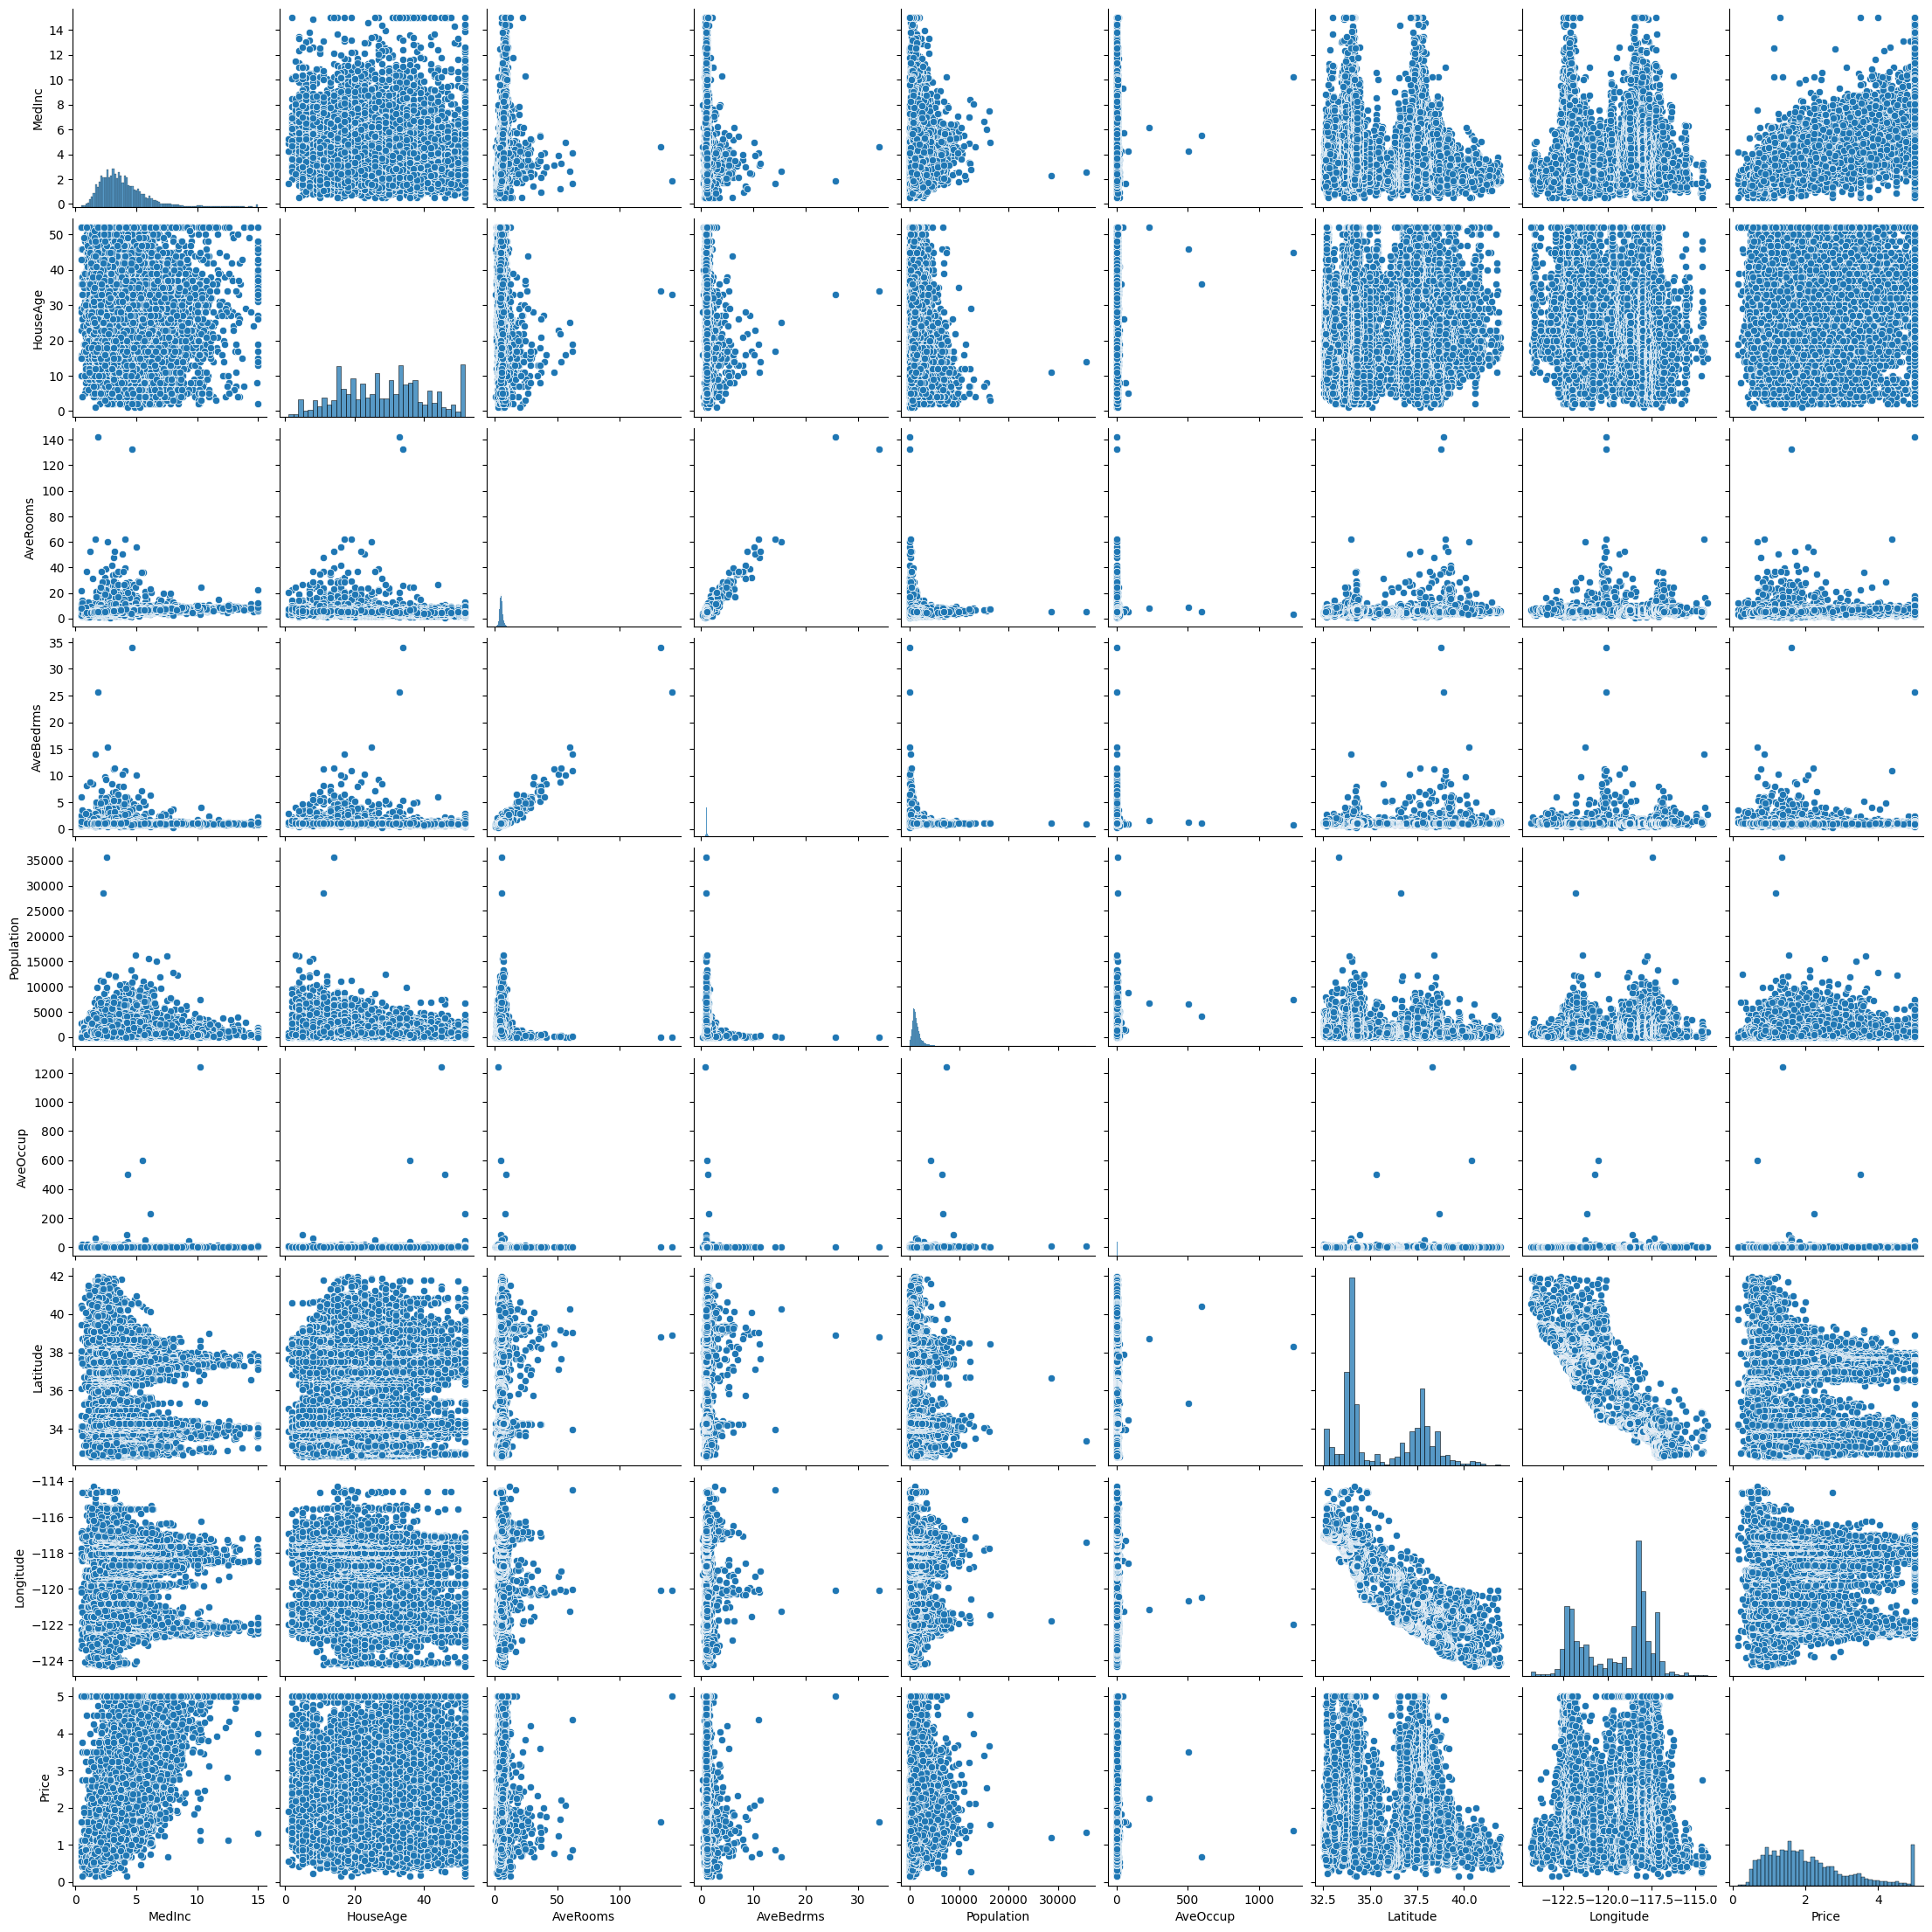

In [22]:
sns.pairplot(dataset)

## Boxplot :To detect the outlier in a given dataset

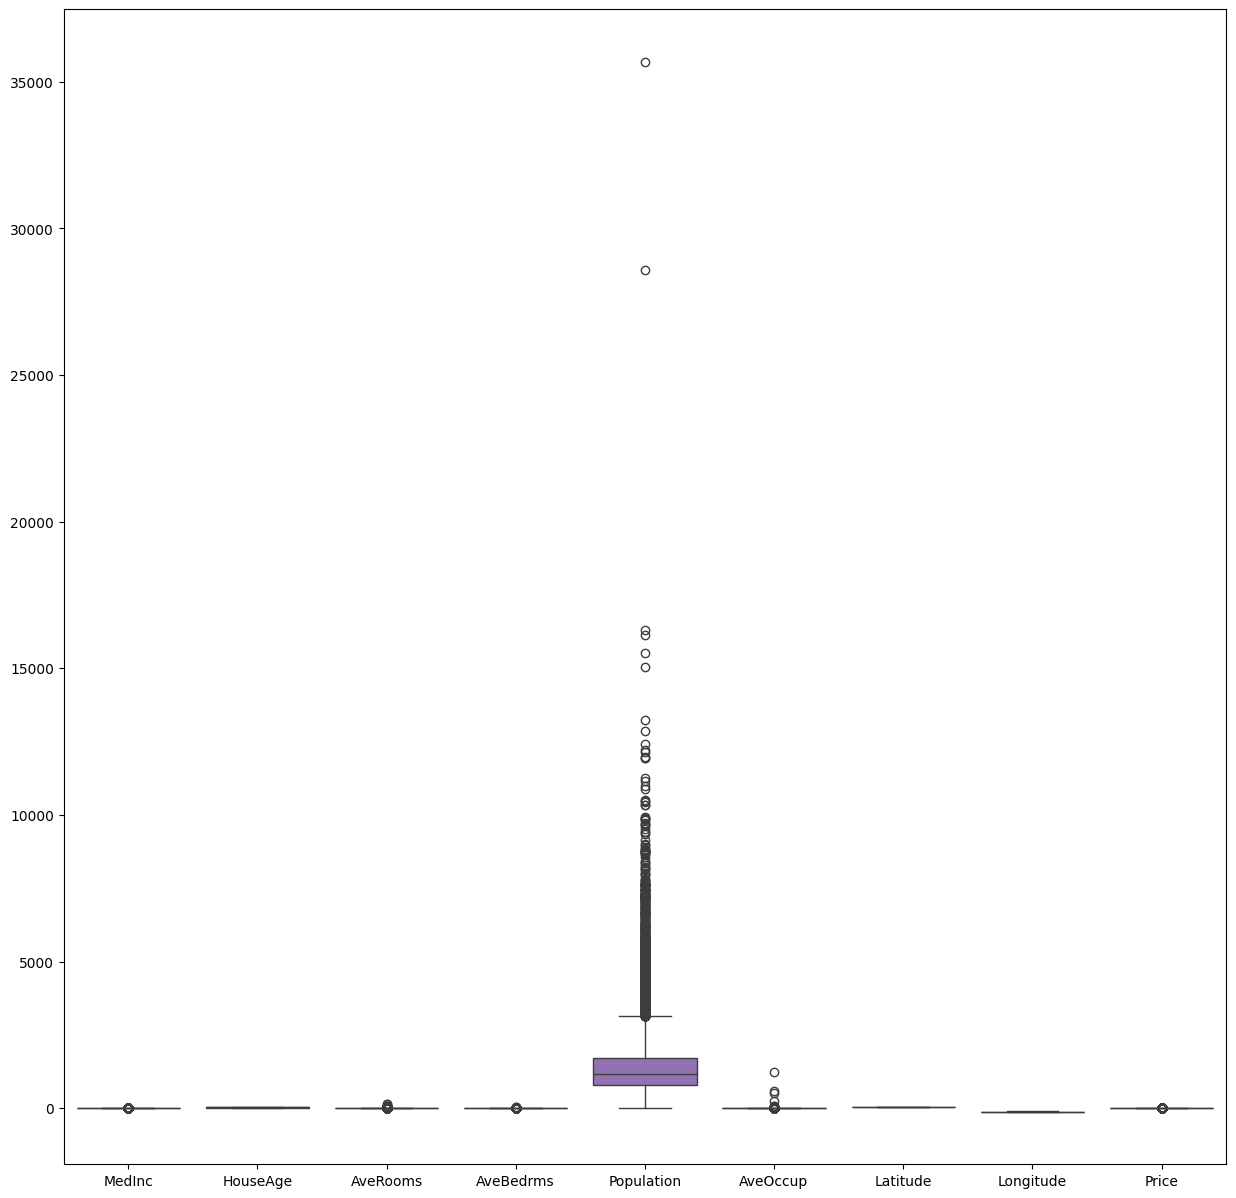

In [23]:
flg,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=dataset)
plt.savefig('boxplot.jpg')

#### split the data into independent &dependet feature

In [24]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [25]:
x

MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]

##### split the data into trin and train set

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train

MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
14196  3.2596      33.0  5.017657  ...  3.691814     32.71    -117.03
8267   3.8125      49.0  4.473545  ...  1.738095     33.77    -118.16
17445  4.1563       4.0  5.645833  ...  2.723214     34.66    -120.48
14265  1.9425      36.0  4.002817  ...  3.994366     32.69    -117.11
2271   3.5542      43.0  6.268421  ...  2.300000     36.78    -119.80
...       ...       ...       ...  ...       ...       ...        ...
11284  6.3700      35.0  6.129032  ...  3.032258     33.78    -117.96
11964  3.0500      33.0  6.868597  ...  3.904232     34.02    -117.43
5390   2.9344      36.0  3.986717  ...  3.332068     34.03    -118.38
860    5.7192      15.0  6.395349  ...  3.178891     37.58    -121.96
15795  2.5755      52.0  3.402576  ...  2.108696     37.77    -122.42

[16512 rows x 8 columns]

In [28]:
x_test

MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
20046  1.6812      25.0  4.192201  ...  3.877437     36.06    -119.01
3024   2.5313      30.0  5.039384  ...  2.679795     35.14    -119.46
15663  3.4801      52.0  3.977155  ...  1.360332     37.80    -122.44
20484  5.7376      17.0  6.163636  ...  3.444444     34.28    -118.72
9814   3.7250      34.0  5.492991  ...  2.483645     36.62    -121.93
...       ...       ...       ...  ...       ...       ...        ...
15362  4.6050      16.0  7.002212  ...  2.988938     33.36    -117.22
16623  2.7266      28.0  6.131915  ...  2.340426     35.36    -120.83
18086  9.2298      25.0  7.237676  ...  2.790493     37.31    -122.05
2144   2.7850      36.0  5.289030  ...  2.588608     36.77    -119.76
3665   3.5521      17.0  3.988839  ...  3.729911     34.22    -118.37

[4128 rows x 8 columns]

In [29]:
y_train

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: Price, Length: 16512, dtype: float64

In [30]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: Price, Length: 4128, dtype: float64

##### Normalization of the given data points

In [31]:
from sklearn .preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [32]:
x_test

array([[-1.15508475, -0.28632369, -0.52068576, ...,  0.06740798,
         0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, ..., -0.03602975,
        -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, ..., -0.14998876,
         1.00947776, -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, ..., -0.02646898,
         0.78014149, -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, ..., -0.04390537,
         0.52740357, -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 , ...,  0.05466644,
        -0.66608108,  0.60445493]])

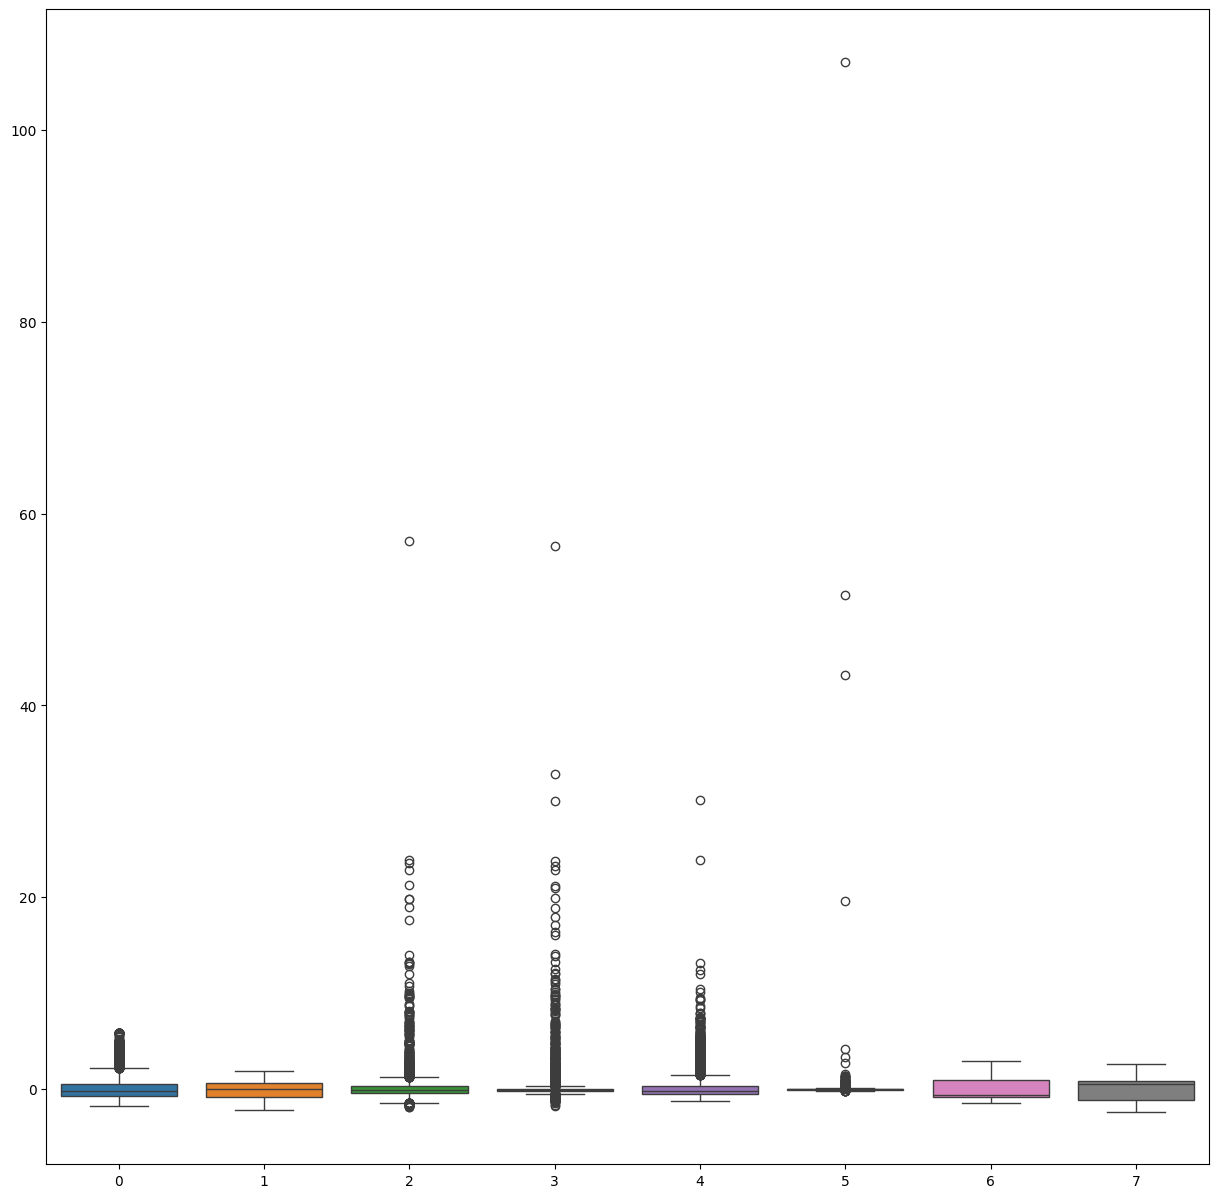

In [ ]:
flg,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=x_train,ax=ax)
plt.savefig('boxplotTrain.jpg')

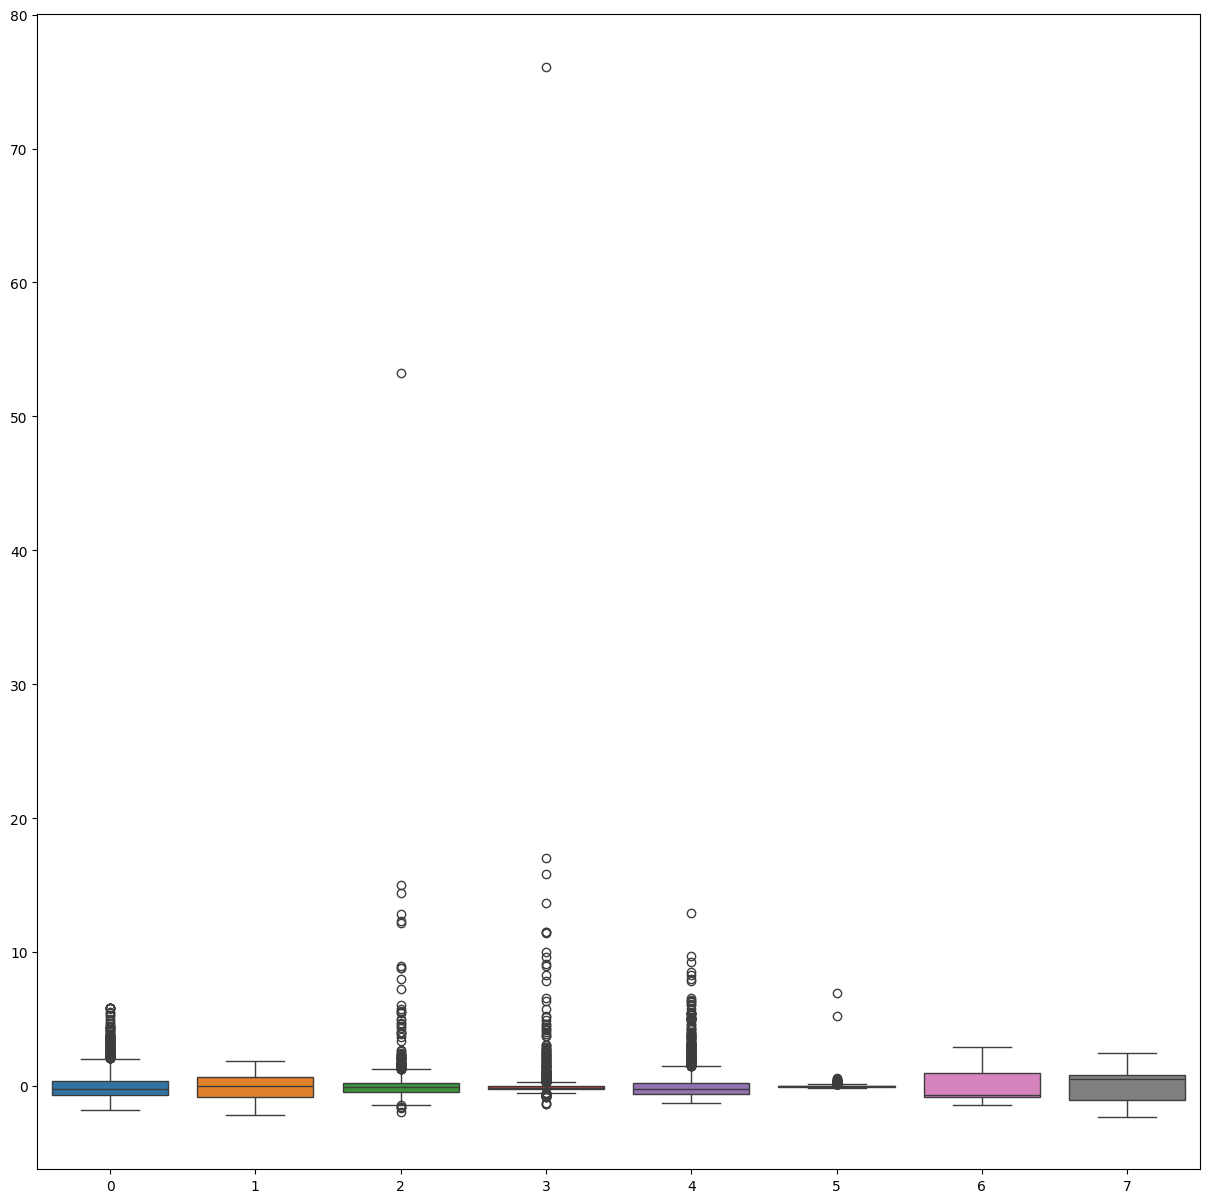

In [ ]:
flg,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=x_test,ax=ax)
plt.savefig('boxplottest.jpg')

## Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regression.coef_)

[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


In [ ]:
print(regression.intercept_)

2.0719469373788777


# Model Prediction

In [ ]:
reg_pred=regression.predict(x_test)
print(reg_pred)

[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


##### calculate the error of residual

In [ ]:
residuals=y_test-reg_pred

In [ ]:
residuals

20046   -0.242123
3024    -1.306017
15663    2.290351
20484   -0.652926
9814     0.175343
           ...   
15362    0.641254
16623    0.418161
18086    0.531240
2144    -0.464511
3665    -0.494403
Name: Price, Length: 4128, dtype: float64

##### distribution plot of the residual

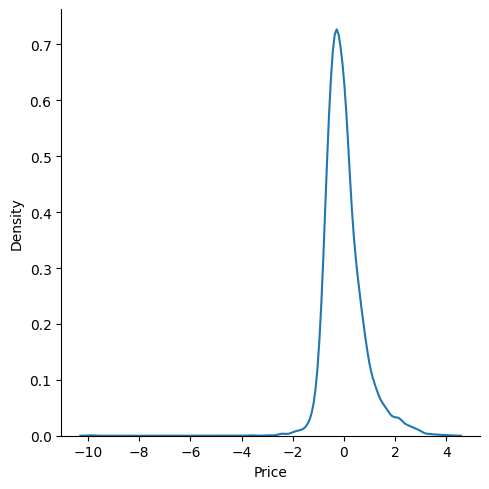

In [ ]:
sns.displot(residuals,kind="kde")

## Model Performance

In [ ]:
# lower error value=MSE & MAE
# higher value=r2 score & adjusted r2 score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(r2_score(y_test,reg_pred))

0.5558915986952442
0.5332001304956565
0.575787706032451


##### adjusted R-square

In [ ]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_text_norm_shape[1]-1) this is formula in R-square

NameError: name 'score' is not defined

### Save the model -> Pickle file

In [ ]:
import pickle
pickle.dump(regression,open('model.pkl','wb'))

#### load the file and use it for future test data predictions

In [ ]:
model=pickle.load(open('model.pkl','rb'))


In [ ]:
scaler = StandardScaler()
scaler.fit(housing.data)
model.predict(scaler.transform(housing.data[0].reshape(1, -1)))


array([4.1736342])

In [ ]:
model.predict(x_test)

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [34]:
from sklearn.linear_model import Lasso,Ridge
lasso_regression=Lasso(alpha=0.1)
lasso_regression.fit(x_train,y_train)

# Corrected typo in the variable name from ridge_regreesion to ridge_regression
ridge_regression=Ridge(alpha=1.0)
ridge_regression.fit(x_train,y_train)

Ridge()

In [35]:
lasso_pred=lasso_regression.predict(x_test)


In [36]:
ridge_pred=ridge_regression.predict(x_test)

In [39]:
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))


NameError: name 'mean_squared_error' is not defined